In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats

In [2]:
"""Load dataset in a DataFrame"""
df = pd.read_csv(r'/Users/aaronlin/Desktop/MLproject/ML2022/data/jan_2021_to_feb_2022_linear_output.csv')
df

,match_id,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,5792362494,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5794821137,-1,0,0,0,-1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
2,5790226407,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5790375758,1,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
4,5790649968,-1,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,6437920662,1,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0
12382,6453048875,-1,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
12383,6409570374,-1,0,0,-1,0,0,0,0,0,...,0,0,-1,0,1,0,1,0,0,0
12384,6437061441,-1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [3]:
# check missing data
df.isnull().values.any()

False

In [4]:
# delete cluster_id
df.drop(['match_id'], axis=1, inplace=True)

In [6]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_mode')

In [7]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_type')

In [9]:
#group1 winning team: 1; gropu2 winning team: -1
group1 = df[df["match_result"] == 1]
group2 = df[df["match_result"] == -1]

In [10]:
group1

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12378,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12379,1,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12381,1,0,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0


In [11]:
group2

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
1,-1,0,0,0,-1,1,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
8,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
9,-1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
10,-1,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,-1,0,-1,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
12380,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
12382,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
12383,-1,0,0,-1,0,0,0,0,0,0,...,0,0,-1,0,1,0,1,0,0,0


<AxesSubplot:>

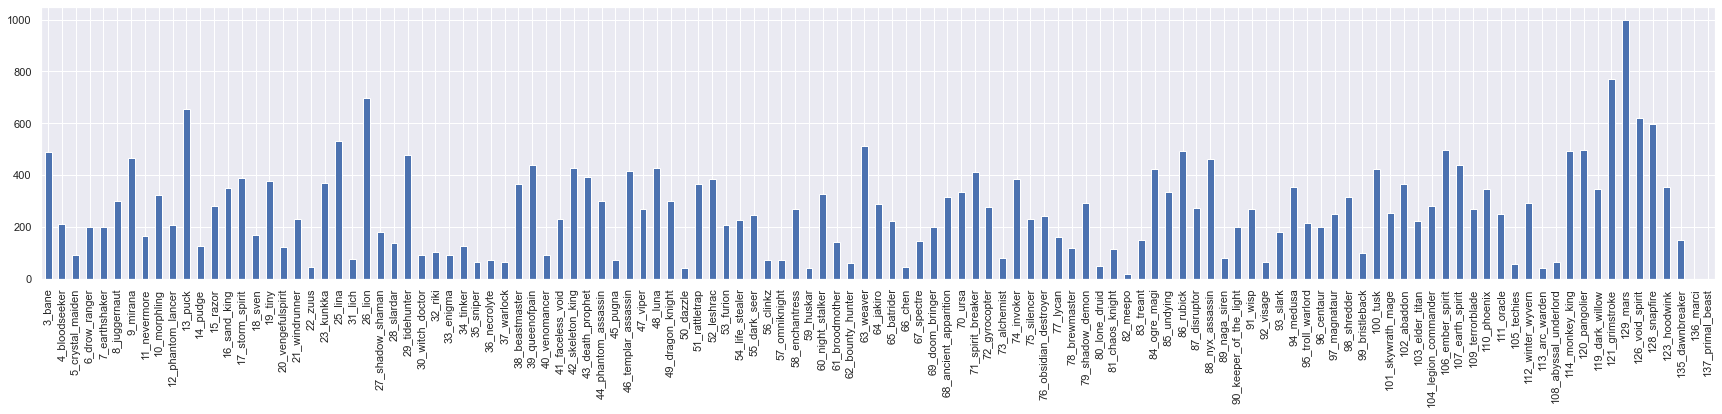

In [12]:
# group1 winning team heroes 
count_group1_winning = group1[group1 == 1].sum(axis=0)[3:]
count_group1_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

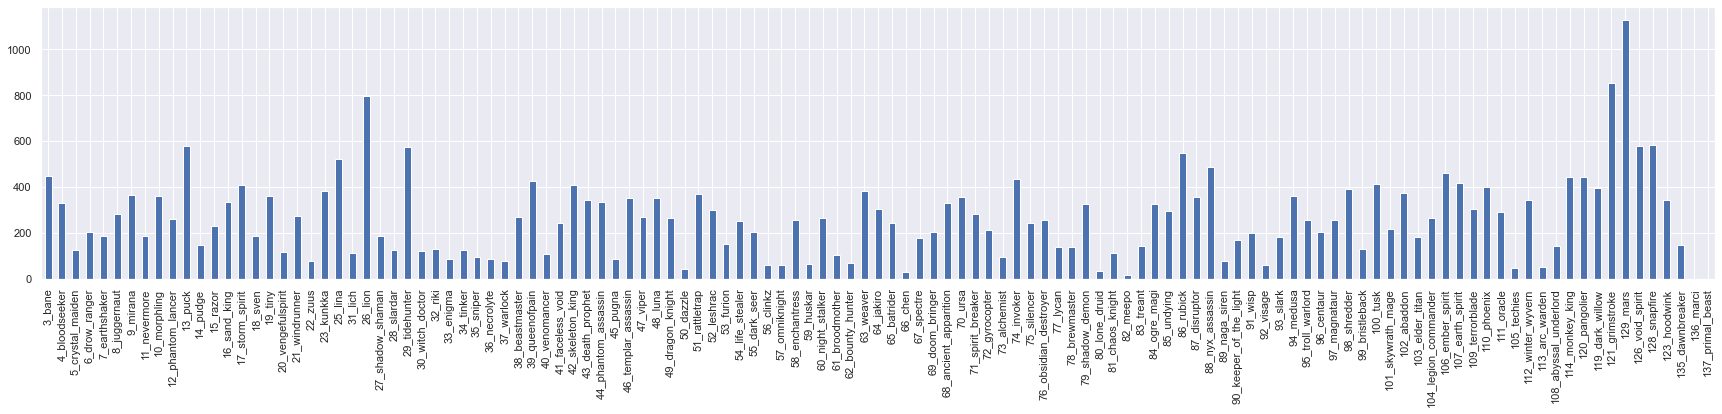

In [13]:
# group1 losing team heroes
count_group1_losing = group1[group1 == -1].sum(axis=0)[3:]
count_group1_losing.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

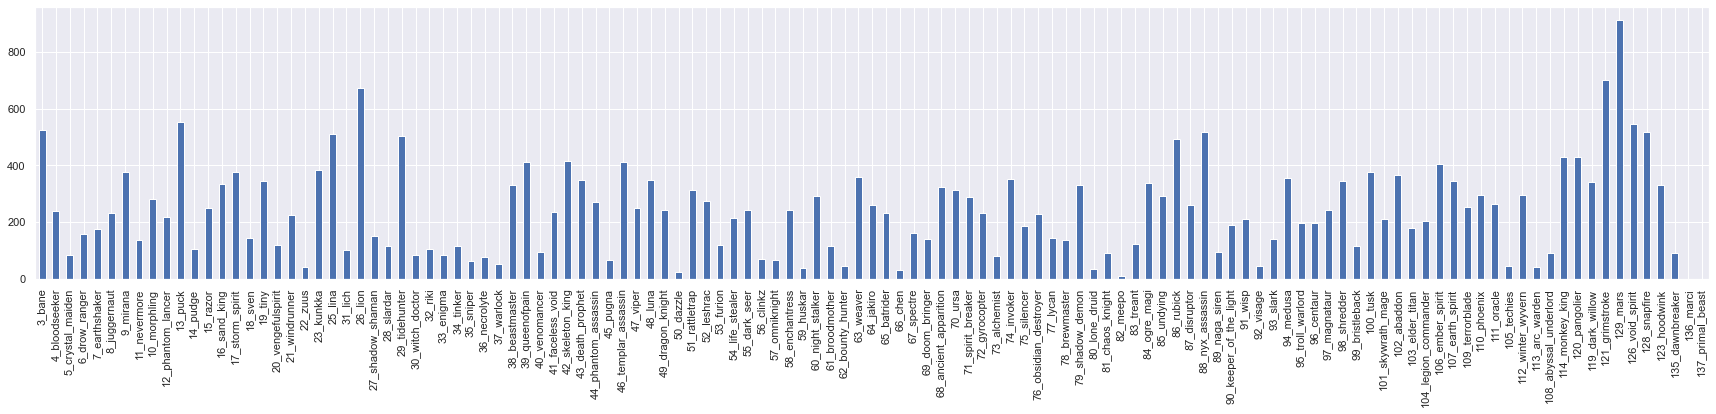

In [14]:
# group2 winning team heroes
count_group2_winning = group2[group2 == -1].sum(axis=0)[3:]
count_group2_winning.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

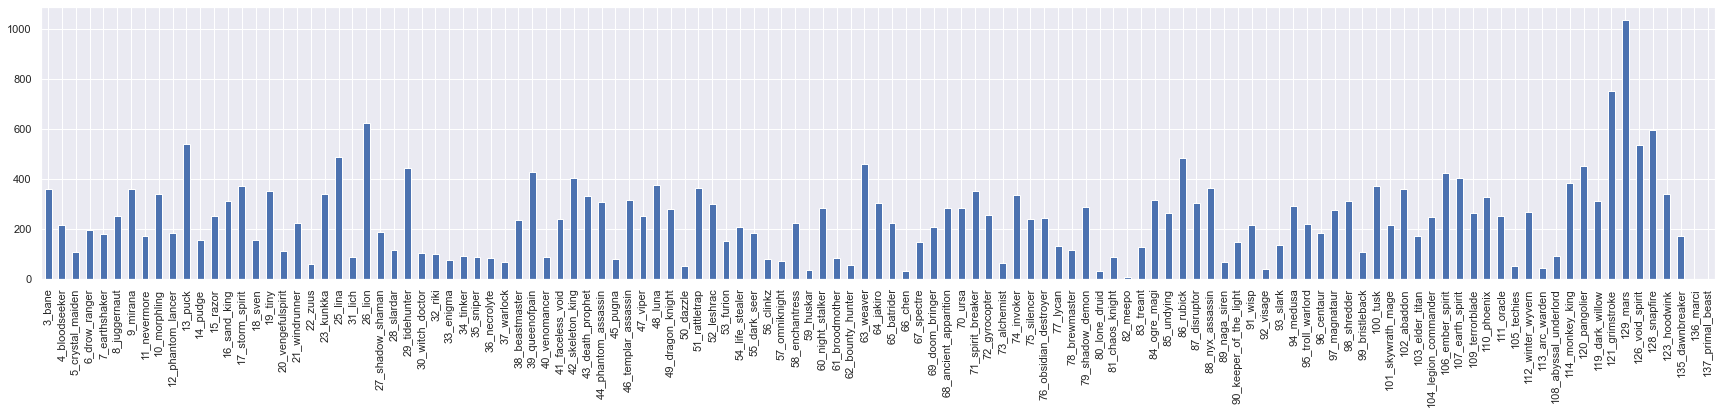

In [15]:
# group2 losing team heroes
count_group2_losing = group2[group2 == 1].sum(axis=0)[3:]
count_group2_losing.plot.bar(figsize=(30,5))

<AxesSubplot:>

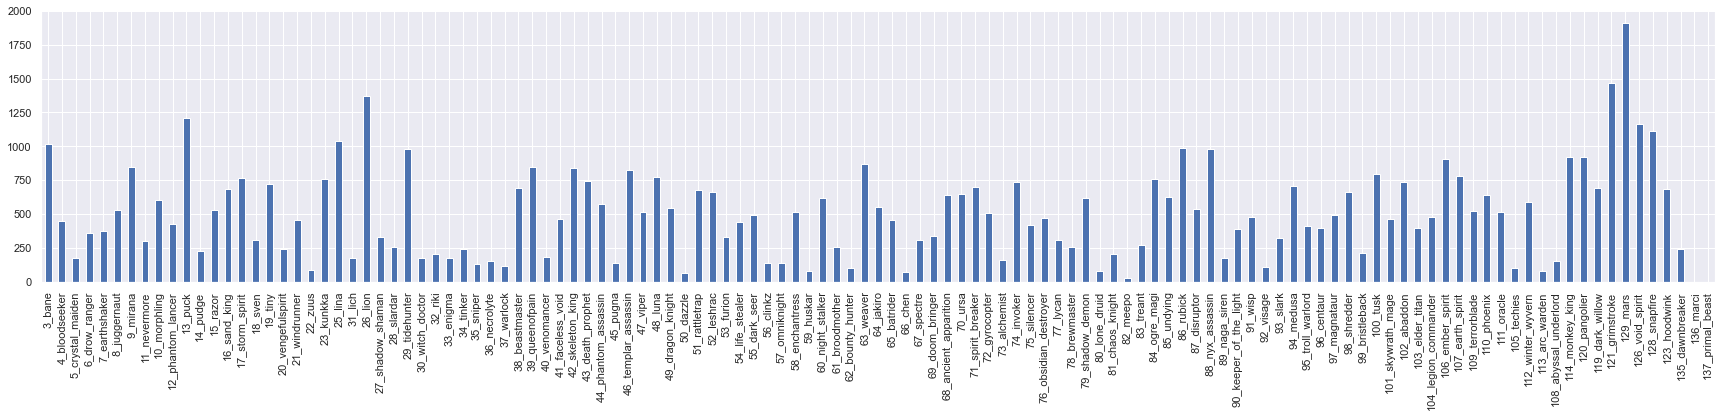

In [16]:
# count all winning 
count_all_winning = count_group1_winning + count_group2_winning.abs()
count_all_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

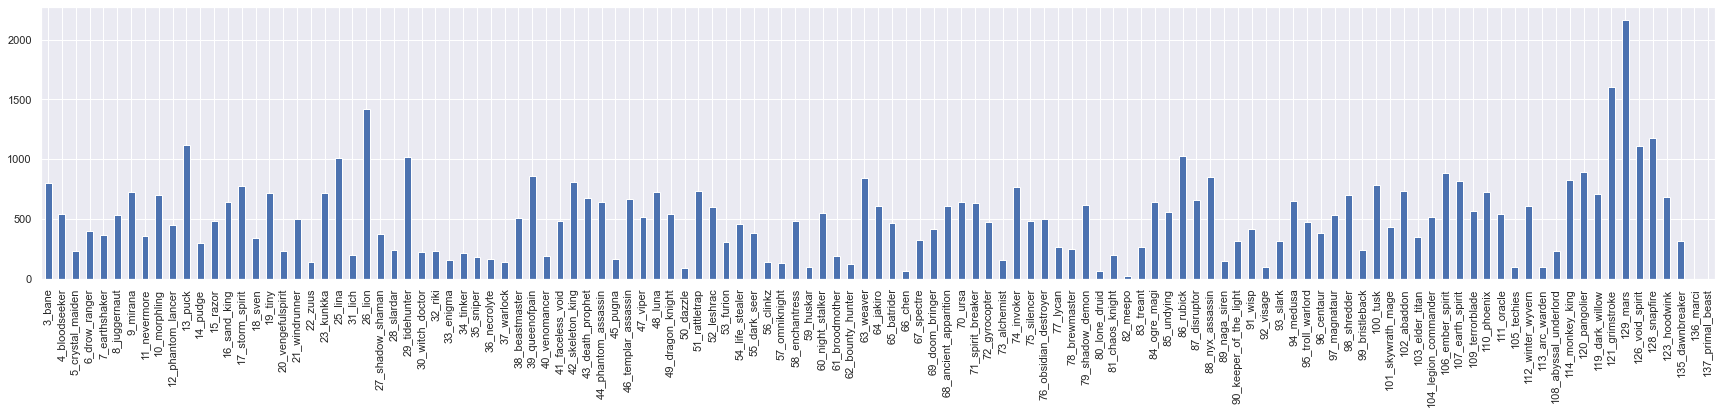

In [17]:
# count all losing
count_all_losing = count_group1_losing.abs() + count_group2_losing
count_all_losing.plot.bar(figsize=(30,5))

In [18]:
#top 10 used heroes between winning and losing (among all groups)
print('winning team heroes counts')
print(count_all_winning.nlargest(n=10))
print('\n')
print('losing team heroes counts')
print(count_all_losing.nlargest(n=10))

winning team heroes counts
129_mars           1912.0
121_grimstroke     1471.0
26_lion            1369.0
13_puck            1209.0
126_void_spirit    1166.0
128_snapfire       1116.0
25_lina            1041.0
3_bane             1015.0
86_rubick           988.0
29_tidehunter       979.0
dtype: float64


losing team heroes counts
129_mars           2165.0
121_grimstroke     1605.0
26_lion            1419.0
128_snapfire       1176.0
13_puck            1115.0
126_void_spirit    1111.0
86_rubick          1030.0
29_tidehunter      1017.0
25_lina            1008.0
120_pangolier       892.0
dtype: float64


In [19]:
#group1 heroes
group1_heroes = group1.iloc[:,3:]
group1_heroes

,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,10_morphling,12_phantom_lancer,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12378,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12379,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12381,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0


In [20]:
# group2 heroes
group2_heroes = group2.iloc[:,3:]
group2_heroes

,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,10_morphling,12_phantom_lancer,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
1,0,-1,1,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,-1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,-1,0,0,0,0,0,0
9,0,0,0,0,1,1,0,0,-1,0,...,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,0,0,0,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
12380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
12382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
12383,-1,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,1,0,1,0,0,0


In [21]:
# Get winning heroes combination from group1
gp1_winning_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp1_winning_heroes.append(combination)

print(len(gp1_winning_heroes))

6490


In [22]:
# Count winning combinations in group1
counts_gp1Combination_win = pd.Series(gp1_winning_heroes).value_counts()
print(counts_gp1Combination_win.nlargest(n=10))

[26_lion, 42_skeleton_king, 74_invoker, 102_abaddon]                                       3
[19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk]                                 2
[17_storm_spirit, 26_lion, 54_life_stealer, 98_shredder, 121_grimstroke]                   2
[13_puck, 38_beastmaster, 84_ogre_magi, 94_medusa, 101_skywrath_mage]                      2
[44_phantom_assassin, 58_enchantress, 71_spirit_breaker, 126_void_spirit, 128_snapfire]    2
[17_storm_spirit, 26_lion, 37_warlock, 98_shredder]                                        2
[11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan]                           2
[35_sniper, 41_faceless_void, 60_night_stalker, 75_silencer, 112_winter_wyvern]            2
[63_weaver, 79_shadow_demon, 107_earth_spirit, 114_monkey_king, 129_mars]                  2
[39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke]                 2
dtype: int64


In [23]:
# Get winning heroes combination from group2
gp2_winning_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp2_winning_heroes.append(combination)

print(len(gp2_winning_heroes))

5896


In [24]:
# Count the winning combinations in group2
counts_gp2Combination_win = pd.Series(gp2_winning_heroes).value_counts()
print(counts_gp2Combination_win.nlargest(n=10))

[19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur]            3
[49_dragon_knight, 54_life_stealer, 58_enchantress, 74_invoker, 112_winter_wyvern]    2
[44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk]            2
[17_storm_spirit, 42_skeleton_king, 43_death_prophet, 86_rubick, 129_mars]            2
[4_bloodseeker, 13_puck, 28_slardar, 86_rubick, 121_grimstroke]                       2
[26_lion, 77_lycan, 95_troll_warlord, 98_shredder, 110_phoenix]                       2
[9_mirana, 29_tidehunter, 66_chen, 89_naga_siren, 106_ember_spirit]                   2
[17_storm_spirit, 55_dark_seer, 67_spectre, 88_nyx_assassin, 110_phoenix]             2
[13_puck, 26_lion, 85_undying, 109_terrorblade, 129_mars]                             2
[3_bane, 44_phantom_assassin, 86_rubick, 106_ember_spirit, 129_mars]                  2
dtype: int64


In [25]:
# Get losing heroes combination from group1
gp1_losing_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp1_losing_heroes.append(combination)

print(len(gp1_losing_heroes))

6490


In [26]:
# Count losing combinations in group1
counts_gp1Combination_lose = pd.Series(gp1_losing_heroes).value_counts()
print(counts_gp1Combination_lose.nlargest(n=10))

[25_lina, 42_skeleton_king, 58_enchantress, 110_phoenix, 120_pangolier]             2
[26_lion, 29_tidehunter, 52_leshrac, 91_wisp, 103_elder_titan]                      2
[26_lion, 48_luna, 102_abaddon, 106_ember_spirit, 129_mars]                         2
[9_mirana, 13_puck, 28_slardar, 99_bristleback, 114_monkey_king]                    2
[16_sand_king, 19_tiny, 119_dark_willow, 121_grimstroke, 126_void_spirit]           2
[4_bloodseeker, 28_slardar, 74_invoker, 114_monkey_king, 128_snapfire]              2
[27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars]          2
[19_tiny, 64_jakiro, 97_magnataur, 112_winter_wyvern]                               2
[42_skeleton_king, 43_death_prophet, 107_earth_spirit, 121_grimstroke, 129_mars]    2
[5_crystal_maiden, 27_shadow_shaman, 29_tidehunter, 63_weaver, 106_ember_spirit]    2
dtype: int64


In [27]:
# Get losing heroes combination from group2
gp2_losing_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp2_losing_heroes.append(combination)

print(len(gp2_losing_heroes))

5896


In [28]:
# Count losing combinations in group2
counts_gp2Combination_lose = pd.Series(gp2_losing_heroes).value_counts()
print(counts_gp2Combination_lose.nlargest(n=10))

[13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire]               3
[13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke]                     3
[46_templar_assassin, 60_night_stalker, 67_spectre, 88_nyx_assassin, 128_snapfire]      2
[6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan]                             2
[9_mirana, 46_templar_assassin, 97_magnataur, 104_legion_commander, 111_oracle]         2
[8_juggernaut, 21_windrunner, 23_kunkka, 27_shadow_shaman, 129_mars]                    2
[26_lion, 48_luna, 107_earth_spirit, 108_abyssal_underlord, 126_void_spirit]            2
[23_kunkka, 30_witch_doctor, 94_medusa, 96_centaur, 119_dark_willow]                    2
[17_storm_spirit, 29_tidehunter, 54_life_stealer, 63_weaver, 87_disruptor]              2
[10_morphling, 76_obsidian_destroyer, 107_earth_spirit, 111_oracle, 126_void_spirit]    2
dtype: int64


In [29]:
# Sum winning combinations from group1 and group2 
combine_group_winning = gp1_winning_heroes + gp2_winning_heroes
counts_combine_group_winning = pd.Series(combine_group_winning).value_counts()
print(counts_combine_group_winning.nlargest(n=10))

[26_lion, 42_skeleton_king, 74_invoker, 102_abaddon]                          4
[19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur]    3
[19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk]                    2
[11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan]              2
[9_mirana, 29_tidehunter, 52_leshrac, 84_ogre_magi]                           2
[44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk]    2
[19_tiny, 51_rattletrap, 52_leshrac, 66_chen, 95_troll_warlord]               2
[39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke]    2
[25_lina, 48_luna, 49_dragon_knight, 74_invoker, 112_winter_wyvern]           2
[13_puck, 26_lion, 48_luna, 102_abaddon, 120_pangolier]                       2
dtype: int64


In [30]:
# Sum losing combinations from group1 and group2
combine_group_losing = gp1_losing_heroes + gp2_losing_heroes
counts_combine_group_losing = pd.Series(combine_group_losing).value_counts()
print(counts_combine_group_losing.nlargest(n=10))

[13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke]                      3
[13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire]                3
[9_mirana, 16_sand_king, 17_storm_spirit, 44_phantom_assassin, 128_snapfire]             2
[9_mirana, 46_templar_assassin, 97_magnataur, 104_legion_commander, 111_oracle]          2
[3_bane, 94_medusa, 119_dark_willow, 129_mars, 126_void_spirit]                          2
[38_beastmaster, 42_skeleton_king, 107_earth_spirit, 121_grimstroke, 126_void_spirit]    2
[25_lina, 49_dragon_knight, 112_winter_wyvern, 114_monkey_king, 123_hoodwink]            2
[26_lion, 29_tidehunter, 52_leshrac, 91_wisp, 103_elder_titan]                           2
[8_juggernaut, 84_ogre_magi, 119_dark_willow, 126_void_spirit]                           2
[39_queenofpain, 44_phantom_assassin, 51_rattletrap, 110_phoenix, 129_mars]              2
dtype: int64
